In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import joblib

In [2]:
df = pd.read_csv("productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Cleaning the data

In [3]:
df = df.drop(["date", "department", "idle_time", "idle_men"], axis=1)

In [4]:
df.isnull().sum()

quarter                    0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [5]:
df['wip'].fillna(0,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_20660\3733982707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(0,inplace=True)


In [6]:
df.isnull().sum()

quarter                  0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [7]:
df

,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,Thursday,8,0.80,26.16,1108.0,7080,98,0,59.0,0.940725
1,Quarter1,Thursday,1,0.75,3.94,0.0,960,0,0,8.0,0.886500
2,Quarter1,Thursday,11,0.80,11.41,968.0,3660,50,0,30.5,0.800570
3,Quarter1,Thursday,12,0.80,11.41,968.0,3660,50,0,30.5,0.800570
4,Quarter1,Thursday,6,0.80,25.90,1170.0,1920,50,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,Wednesday,10,0.75,2.90,0.0,960,0,0,8.0,0.628333
1193,Quarter2,Wednesday,8,0.70,3.90,0.0,960,0,0,8.0,0.625625
1194,Quarter2,Wednesday,7,0.65,3.90,0.0,960,0,0,8.0,0.625625
1195,Quarter2,Wednesday,9,0.75,2.90,0.0,1800,0,0,15.0,0.505889


In [8]:

df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,687.228070,4567.460317,38.210526,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1514.582341,3348.823563,160.182643,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,2.000000,89.000000,1.120437


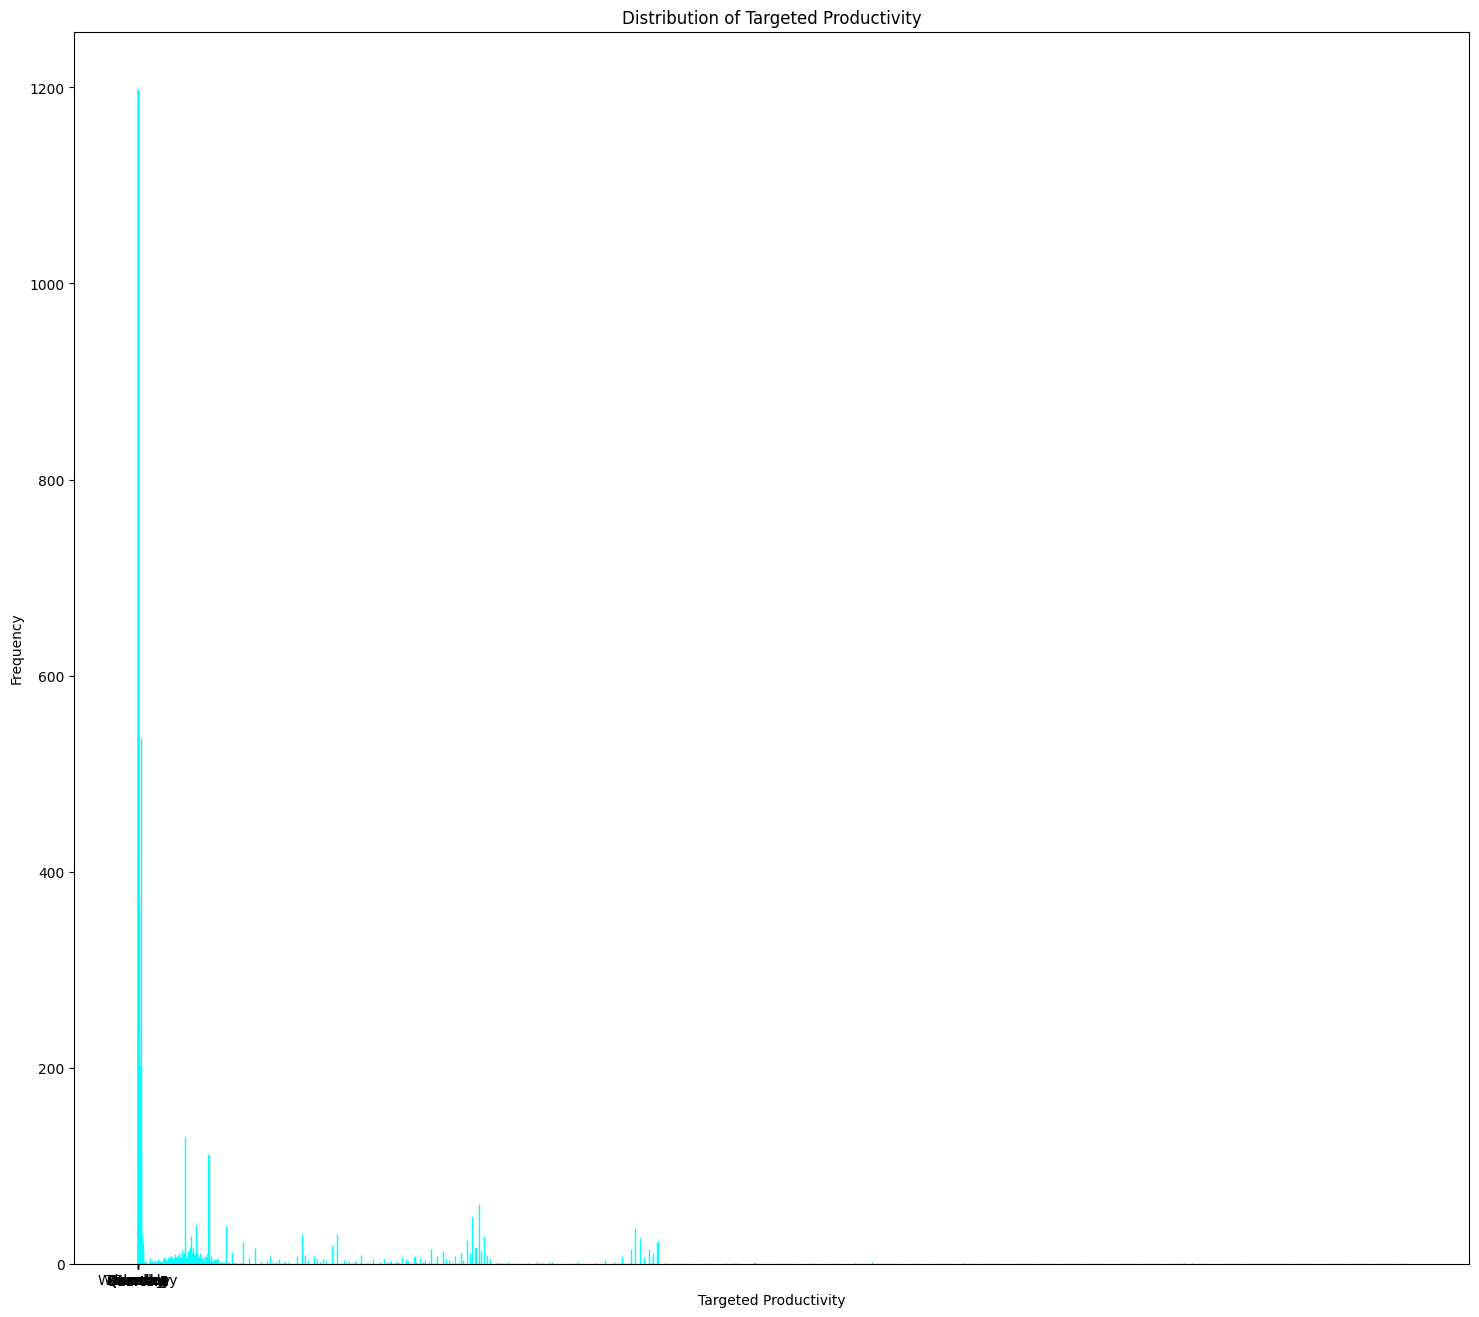

In [9]:
plt.figure(figsize=(18, 16))
plt.hist(df, bins=2000, edgecolor="cyan")
plt.xlabel("Targeted Productivity")
plt.ylabel("Frequency")
plt.title("Distribution of Targeted Productivity")
plt.show()

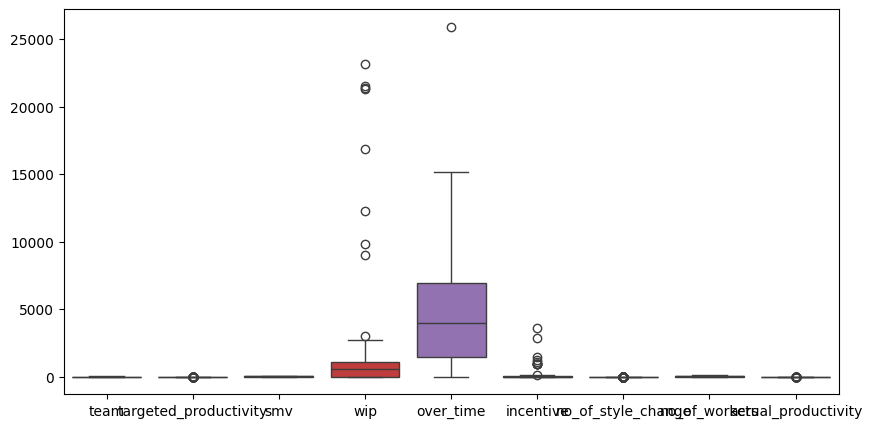

In [10]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df, orient ='v',width=0.8)

In [11]:
df.shape

(1197, 11)

In [12]:
Q1 = df.incentive.quantile(0.25)
Q3 = df.incentive.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df.incentive>lower_limit)&(df.incentive<upper_limit)]

In [13]:
df.head()
df.shape

(1186, 11)

In [14]:

Q1 = df.over_time.quantile(0.25)
Q3 = df.over_time.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df.over_time>lower_limit)&(df.over_time<upper_limit)]
df.shape

(1185, 11)

In [15]:
Q1 = df.wip.quantile(0.25)
Q3 = df.wip.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df=df[(df.wip>lower_limit)&(df.wip<upper_limit)]
df.shape

(1176, 11)

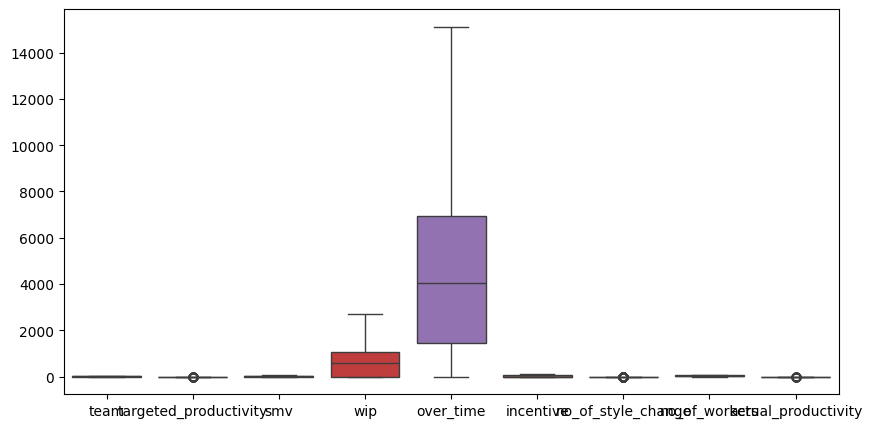

In [16]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df, orient ='v',width=0.8)

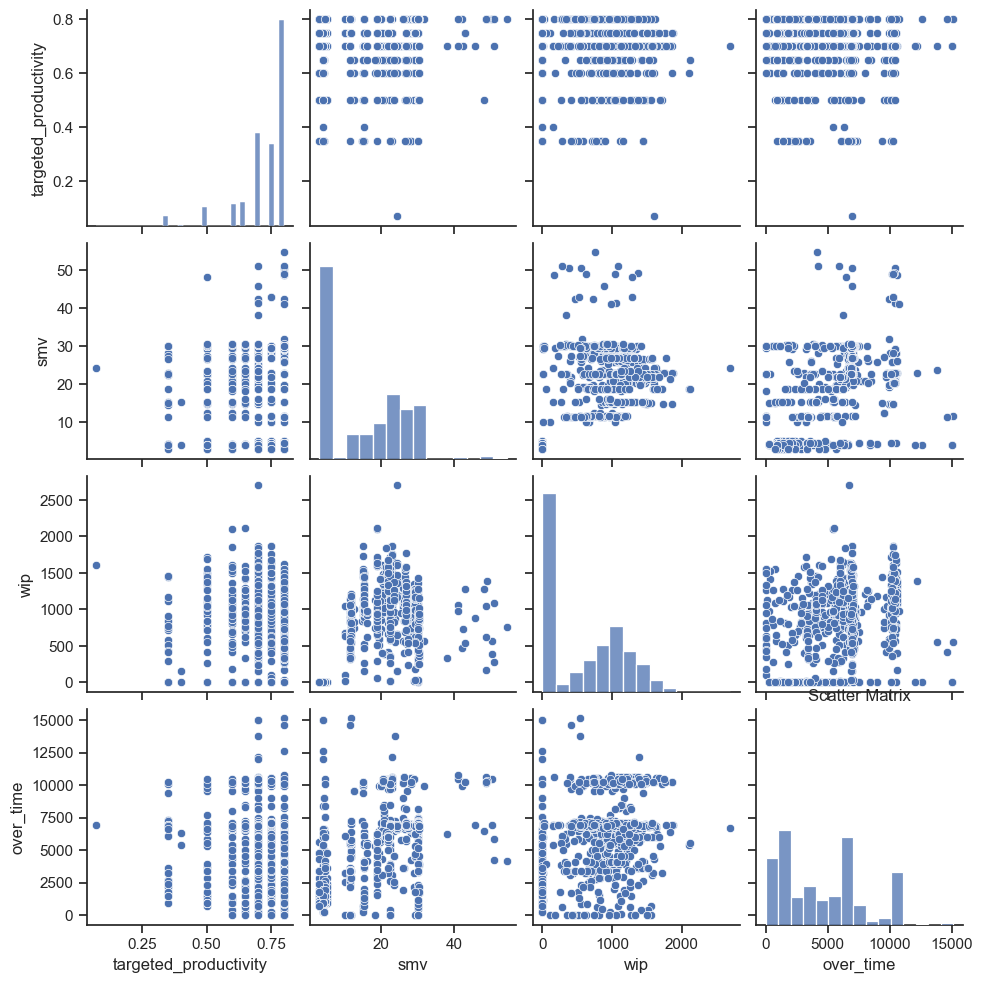

In [17]:
sns.set(style="ticks")
sns.pairplot(df, vars=["targeted_productivity", "smv", "wip", "over_time"])
plt.title("Scatter Matrix")
plt.show()

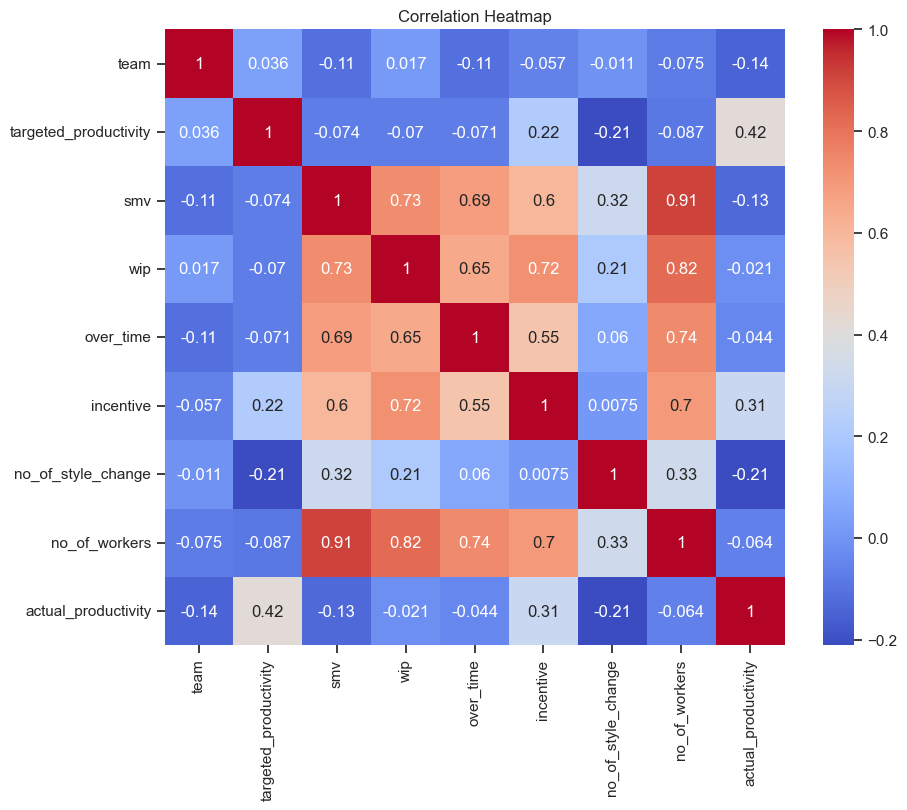

In [18]:
df1=df
df1_num= df1.apply(pd.to_numeric, errors='coerce')
df1_numeric = df1_num.dropna(axis=1, how='all')
correlation = df1_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
day_avg_productivity = df.groupby("day")["targeted_productivity"].mean()

fig = px.bar(day_avg_productivity, x=day_avg_productivity.index, y=day_avg_productivity.values,
             labels={'x': 'Day of the Week', 'y': 'Average Targeted Productivity'},
             title='Day of the Week vs. Average Targeted Productivity')

fig.show()


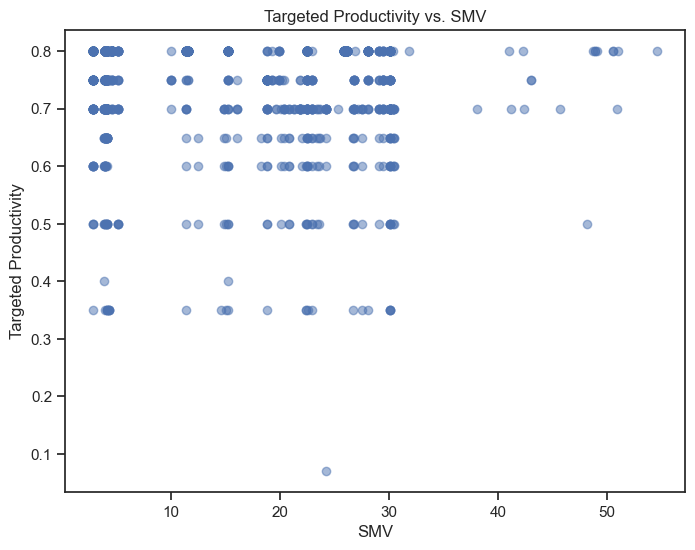

In [20]:
smv = df["smv"]

plt.figure(figsize=(8, 6))
plt.scatter(smv, df["targeted_productivity"], alpha=0.5)
plt.xlabel("SMV")
plt.ylabel("Targeted Productivity")
plt.title("Targeted Productivity vs. SMV")
plt.show()

In [21]:
df_encoded = pd.get_dummies(df, columns=["quarter", "day"])
features= ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
scaler =  MinMaxScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])
print(df_encoded.head())

   team  targeted_productivity       smv       wip  over_time  incentive  \
0     8               1.000000  0.450252  0.410675   0.468254   0.823529   
1     1               0.931507  0.020132  0.000000   0.063492   0.000000   
2    11               1.000000  0.164731  0.358784   0.242063   0.420168   
3    12               1.000000  0.164731  0.358784   0.242063   0.420168   
4     6               1.000000  0.445219  0.433655   0.126984   0.420168   

   no_of_style_change  no_of_workers  actual_productivity  quarter_Quarter1  \
0                 0.0       0.655172             0.797332              True   
1                 0.0       0.068966             0.736180              True   
2                 0.0       0.327586             0.639274              True   
3                 0.0       0.327586             0.639274              True   
4                 0.0       0.620690             0.639062              True   

   quarter_Quarter2  quarter_Quarter3  quarter_Quarter4  quarter_Qua

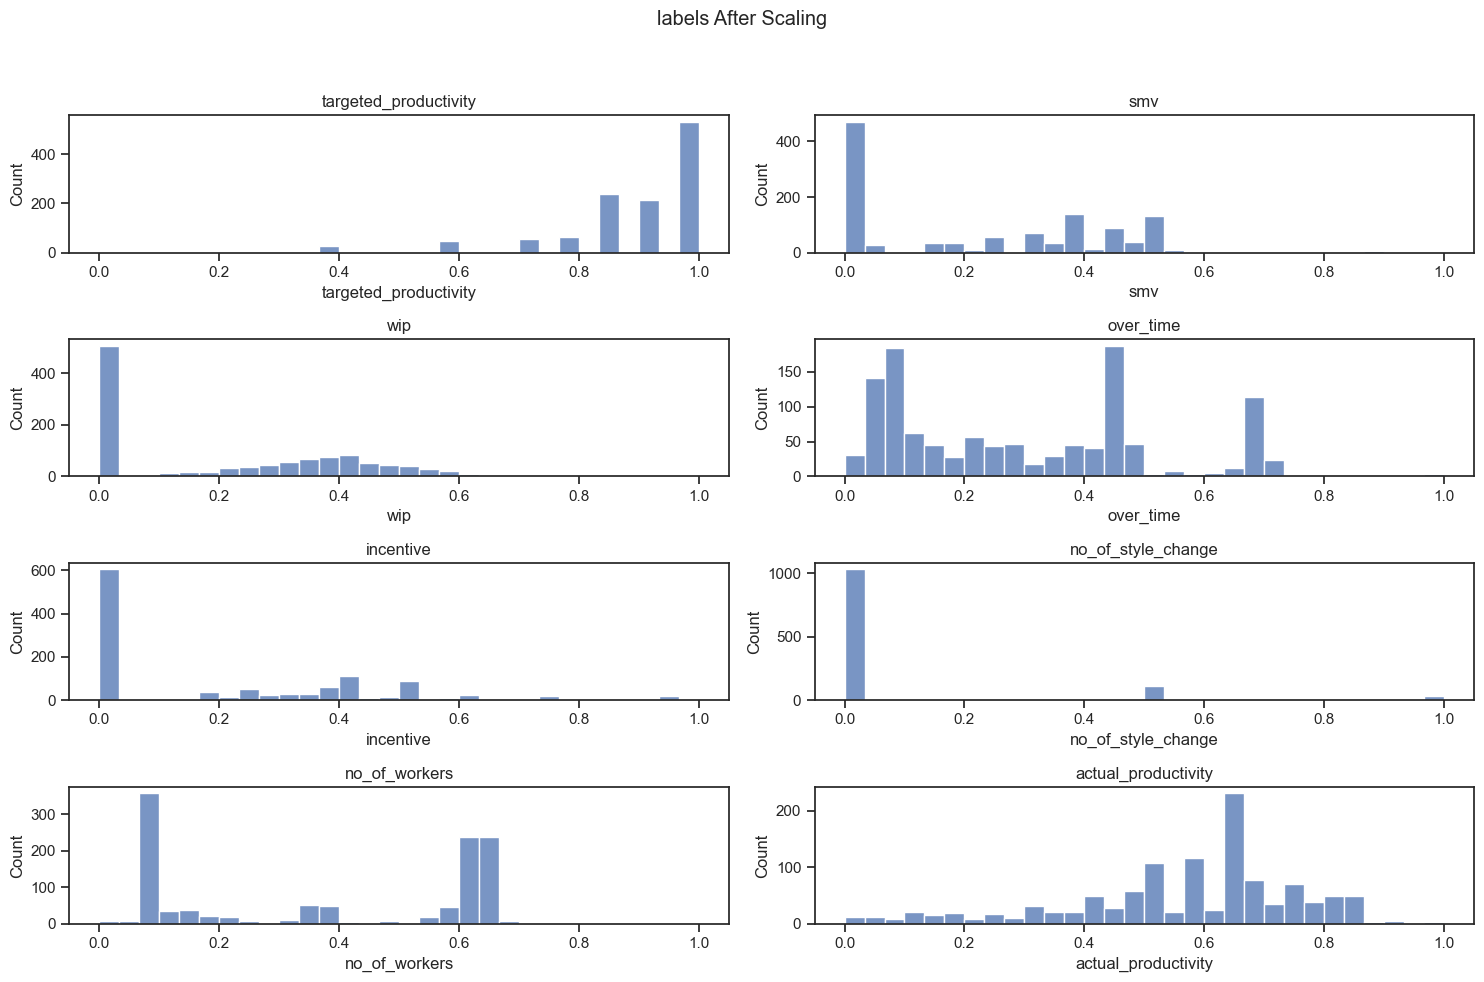

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
fig.suptitle('labels After Scaling')

for i, feature in enumerate(features):
    sns.histplot(df_encoded[feature], bins=30, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [23]:
df_encoded.to_csv('processed_productivity.csv', index=False)

In [24]:
X = df_encoded.drop("targeted_productivity", axis=1)
y = df_encoded["targeted_productivity"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

In [27]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [28]:
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

In [29]:
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

In [30]:
ridge_reg = Ridge(random_state=42)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [31]:
lasso_reg = Lasso(random_state=42)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [32]:
models = {
    "Linear Regression": linear_reg,
    "Random Forest Regression": rf_reg,
    "Gradient Boosting Regression": gb_reg,
    "XGBoost Regression": xgb_reg,
    "Ridge Regression": ridge_reg,
    "Lasso Regression": lasso_reg
}

In [33]:
for model_name, model in models.items():
    if isinstance(model, tuple):
        model = model[0]
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(model_name + ":")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)
    print()

Linear Regression:
Mean Squared Error: 0.014076030284090945
R2 Score: 0.25514084959589134

Random Forest Regression:
Mean Squared Error: 0.008564697959040876
R2 Score: 0.546783182723808

Gradient Boosting Regression:
Mean Squared Error: 0.009747806494044426
R2 Score: 0.4841768085946899

XGBoost Regression:
Mean Squared Error: 0.009602153636883735
R2 Score: 0.49188429865040983

Ridge Regression:
Mean Squared Error: 0.014047249739117938
R2 Score: 0.25666382531021537

Lasso Regression:
Mean Squared Error: 0.019020639322314774
R2 Score: -0.006512273689480708



In [34]:
best_model = max(models, key=lambda x: r2_score(y_test, models[x].predict(X_test)))
print("Best Model:", best_model)

Best Model: Random Forest Regression


In [35]:
best_model_name = max(models, key=lambda x: r2_score(y_test, models[x].predict(X_test)))
best_model = models[best_model_name]

joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']